In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math
from numpy import arange

from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


In [2]:
#THE CCT DATA
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv')
dataframe
print(dataframe.shape)
#print(dataframe.head(n=4))
dataframe

(1272, 14)


,Steel,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345,770
1,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066,805
2,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783,825
3,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732,840
4,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759,755
1268,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612,775
1269,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465,790
1270,XOM07,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465,650


In [3]:
#NORMALIZING THE DATA
dat=dataframe.drop(['Steel'],axis=1)
scaler=MinMaxScaler()
dat[dat.columns.values] = scaler.fit_transform(dat)
dat

,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,0.130952,0.102662,0.043738,0.014599,0.000000,0.011342,0.000000,0.108374,0.000000,0.316325,0.387089,0.915697,0.672414
1,0.130952,0.102662,0.043738,0.014599,0.000000,0.011342,0.000000,0.108374,0.000000,0.316325,0.054827,0.742108,0.793103
2,0.130952,0.102662,0.043738,0.014599,0.000000,0.011342,0.000000,0.108374,0.000000,0.316325,0.004181,0.513751,0.862069
3,0.130952,0.102662,0.041750,0.014599,0.000000,0.011342,0.000000,0.108374,0.000000,0.316325,0.000310,0.285918,0.913793
4,0.130952,0.102662,0.041750,0.014599,0.000000,0.011342,0.000000,0.108374,0.000000,0.316325,0.000013,0.061569,0.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0.214286,0.136882,0.159046,0.204380,0.007576,0.003781,0.023697,0.004926,0.886076,0.669214,0.038697,0.711169,0.620690
1268,0.214286,0.136882,0.159046,0.204380,0.007576,0.003781,0.023697,0.004926,0.886076,0.669214,0.019342,0.649600,0.689655
1269,0.214286,0.136882,0.159046,0.204380,0.007576,0.003781,0.023697,0.004926,0.886076,0.669214,0.009665,0.588031,0.741379
1270,0.214286,0.152091,0.353877,0.049270,0.007576,0.217391,0.023697,0.004926,0.886076,0.669214,0.009665,0.588031,0.258621


In [4]:
#DEPENDENT AND INDEPENDENT VARIABLES
#x=Dependent Variables
#y=Independent Variables

data = pd.DataFrame.values
x=dat.drop(['Texp'], axis = 1)
y=dat.Texp
x=x.astype(float)
y=y.astype(float)


In [11]:
data = pd.DataFrame.values

x=dat.drop(['Texp'], axis = 1)
y=dat[['Texp']]
x=x.astype(float)
y=y.astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

intercept = regression_model.intercept_
coef=regression_model.coef_[0]

for cf in zip(x.columns, coef):
    print("The Coefficient for {} is {:2}".format(cf[0],cf[1]))

weight = coef 
weight


The Coefficient for C is -0.6562744097926596
The Coefficient for Si is 0.1933933667382232
The Coefficient for Mn is -0.6494071958861914
The Coefficient for Cr is -0.14979117298696507
The Coefficient for Mo is -0.05565822344387279
The Coefficient for Ni is -0.5967448073996627
The Coefficient for Al is 0.540391212924218
The Coefficient for Cu is -0.03770238275936017
The Coefficient for ppmB is -0.00345032268269766
The Coefficient for Pa is 0.015490007151010208
The Coefficient for Rc is -0.21584310224348285
The Coefficient for lnRc is -0.2977902557491057


array([-0.65627441,  0.19339337, -0.6494072 , -0.14979117, -0.05565822,
       -0.59674481,  0.54039121, -0.03770238, -0.00345032,  0.01549001,
       -0.2158431 , -0.29779026])

In [209]:
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
intercept = regression_model.intercept_
x2 = sm.add_constant(x, prepend=True, has_constant='skip')
model = sm.OLS(y, x2)
est = model.fit()

residuals=est.resid
residuals
#diagn_residuals=np.identity(len(residuals)) * np.outer(np.ones(len(residuals)), residuals)
diagn_residuals

WEIGHT=1/residuals

x.size, WEIGHT.size, y.size
x.shape, WEIGHT.shape, y.shape
WEIGHT = pd.DataFrame(WEIGHT)
uo=np.multiply(WEIGHT, y)
wls_dat=np.multiply(x, uo)
wls_dat['Texp'] = y

wls_dat



,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,0.861885,0.675684,0.287866,0.096083,0.000000,0.074650,0.000000,0.713284,0.000000,2.081948,2.547690,6.026816,0.672414
1,1.064443,0.834482,0.355520,0.118664,0.000000,0.092194,0.000000,0.880919,0.000000,2.571243,0.445656,6.032205,0.793103
2,1.315416,1.031235,0.439344,0.146642,0.000000,0.113932,0.000000,1.088620,0.000000,3.177486,0.041995,5.160625,0.862069
3,1.818018,1.425256,0.579610,0.202672,0.000000,0.157464,0.000000,1.504567,0.000000,4.391559,0.004299,3.969414,0.913793
4,2.579878,2.022524,0.822502,0.287604,0.000000,0.223450,0.000000,2.135071,0.000000,6.231889,0.000254,1.212966,0.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.117735,0.713991,0.829598,1.066064,0.039516,0.019721,0.123604,0.025695,4.621860,3.490687,0.201849,3.709529,0.620690
1268,0.895886,0.572277,0.664938,0.854470,0.031673,0.015806,0.099071,0.020595,3.704506,2.797850,0.080866,2.715848,0.689655
1269,0.811436,0.518332,0.602259,0.773925,0.028687,0.014316,0.089732,0.018654,3.355306,2.534114,0.036597,2.226698,0.741379
1270,-0.845715,-0.600254,-1.396635,-0.194453,-0.029899,-0.857972,-0.093523,-0.019442,-3.497051,-2.641168,-0.038143,-2.320765,0.258621


In [210]:
data = pd.DataFrame.values
x=wls_dat.drop(['Texp'], axis = 1)
y=wls_dat.Texp
x=x.astype(float)
y=y.astype(float)
y

0       0.672414
1       0.793103
2       0.862069
3       0.913793
4       0.965517
          ...   
1267    0.620690
1268    0.689655
1269    0.741379
1270    0.258621
1271    0.379310
Name: Texp, Length: 1272, dtype: float64

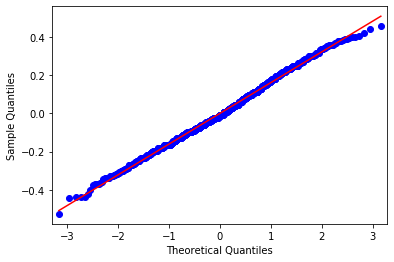

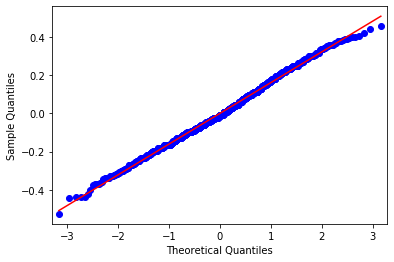

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
intercept = regression_model.intercept_
x2 = sm.add_constant(x, prepend=True, has_constant='skip')
model = sm.OLS(y, x2)
est = model.fit()
residuals=est.resid
sm.qqplot(residuals, line='s')

In [224]:
_, pval, _, f_pval = diag.het_white(residuals, est.model.exog)

if pval>0.05:
    print('For the whites test')
    print("the p-value was {:.4}").format(pval)
    print("we fail to reject the null hypothesis, so there is no heteroscedasticity, \n")

else:
    print('For the whites test')
    print("the p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, so there is heteroscedasticity, \n")

For the whites test
the p-value was 0.0001653
we reject the null hypothesis, so there is heteroscedasticity, 

